In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import eli5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [2]:
doctor = pd.read_csv('data.csv').drop("No",axis=1) # load data
doctor

,# Pregnancies,Blood Chemestry I,Blood Chemestry II,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Quality Index,Outcome,State,Age Group,BloodCh1Tested,BloodCh2Tested,SkinTested,BloodPressureTested,BMIbins,BloodCh1bins
0,1,105,0,58,Null,24.3,0.2,21,13.0,0,CA,20-24,True,False,False,True,<25,100-119
1,2,84,0,0,Null,27.1,0.3,21,46.0,0,CA,20-24,True,False,False,False,25-29,80-99
2,3,90,0,78,Null,42.7,0.6,21,20.0,0,CA,20-24,True,False,False,True,40-44,80-99
3,2,130,0,96,Null,22.6,0.3,21,31.0,0,CA,20-24,True,False,False,True,<25,120-139
4,2,108,0,64,Null,30.8,0.2,21,44.0,0,CA,20-24,True,False,False,True,30-34,100-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,4,197,744,70,39,36.7,2.3,31,65.0,0,NC,30-34,True,True,True,True,35-39,>=180
764,0,198,274,66,32,41.3,0.5,28,52.0,1,NJ,25-29,True,True,True,True,40-44,>=180
765,2,128,182,78,37,43.3,1.2,31,100.0,1,TX,30-34,True,True,True,True,40-44,120-139
766,0,102,105,86,17,29.3,0.7,27,95.0,0,MN,25-29,True,True,True,True,25-29,100-119


In [3]:
doctor.loc[doctor['BloodCh1Tested'] != 1, 'Blood Chemestry I'] = np.nan
doctor.loc[doctor['BloodCh2Tested'] != 1, 'Blood Chemestry II'] = np.nan
doctor.loc[doctor['SkinTested'] != 1, 'Skin Thickness'] = np.nan
doctor.loc[doctor['BloodPressureTested'] != 1, 'Blood Pressure'] = np.nan
doctor['Blood Chemestry I'] = pd.to_numeric(doctor['Blood Chemestry I'])
doctor['Blood Chemestry II'] = pd.to_numeric(doctor['Blood Chemestry II'])
doctor['Skin Thickness'] = pd.to_numeric(doctor['Skin Thickness'])
doctor['Blood Pressure'] = pd.to_numeric(doctor['Blood Pressure'])
doctor['Outcome'] = doctor['Outcome'].astype('bool')

In [4]:
corr_matrix = doctor.corr()
corr_matrix

,# Pregnancies,Blood Chemestry I,Blood Chemestry II,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Quality Index,Outcome,BloodCh1Tested,BloodCh2Tested,SkinTested,BloodPressureTested
# Pregnancies,1.000000,0.125679,0.083385,0.214178,0.098023,0.022960,-0.030736,0.544269,0.036174,0.221898,0.039057,-0.175680,-0.149233,0.014048
Blood Chemestry I,0.125679,1.000000,0.583883,0.223132,0.230833,0.238997,0.137906,0.266052,0.001756,0.494486,NaN,0.030488,-0.038407,0.023830
Blood Chemestry II,0.083385,0.583883,1.000000,0.098349,0.184838,0.229127,0.128843,0.221518,-0.112725,0.304599,0.021102,NaN,NaN,NaN
Blood Pressure,0.214178,0.223132,0.098349,1.000000,0.228901,0.287227,-0.002944,0.330024,0.031699,0.170589,0.033686,-0.152824,-0.128746,NaN
Skin Thickness,0.098023,0.230833,0.184838,0.228901,1.000000,0.649141,0.123849,0.164631,0.019850,0.258345,0.021570,-0.009889,NaN,0.015606
BMI,0.022960,0.238997,0.229127,0.287227,0.649141,1.000000,0.155364,0.029967,-0.011368,0.315639,-0.005103,0.097414,0.108075,0.036487
Genetic Predisposition Factor,-0.030736,0.137906,0.128843,-0.002944,0.123849,0.155364,1.000000,0.032826,0.003793,0.171350,0.042282,0.166267,0.147388,0.055064
Age,0.544269,0.266052,0.221518,0.330024,0.164631,0.029967,0.032826,1.000000,-0.018749,0.238244,0.043436,-0.215415,-0.217682,0.047035
Air Quality Index,0.036174,0.001756,-0.112725,0.031699,0.019850,-0.011368,0.003793,-0.018749,1.000000,0.041942,-0.050767,0.006048,0.020881,0.030802
Outcome,0.221898,0.494486,0.304599,0.170589,0.258345,0.315639,0.171350,0.238244,0.041942,1.000000,0.011798,-0.044489,-0.050450,-0.049597


In [5]:
doctor['Skin Thickness'].fillna(doctor.groupby('BMIbins')['Skin Thickness'].transform('mean'),inplace=True)
doctor['Blood Pressure'].fillna(doctor.groupby('BMIbins')['Blood Pressure'].transform('mean'),inplace=True)
doctor['Blood Chemestry II'].fillna(doctor.groupby('BMIbins')['Blood Chemestry II'].transform('mean'),inplace=True)
doctor['Blood Chemestry I'].fillna(doctor['Blood Chemestry I'].mean(),inplace=True)
doctor.head()

,# Pregnancies,Blood Chemestry I,Blood Chemestry II,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Quality Index,Outcome,State,Age Group,BloodCh1Tested,BloodCh2Tested,SkinTested,BloodPressureTested,BMIbins,BloodCh1bins
0,1,105.0,102.755556,58.000000,17.580645,24.3,0.2,21,13.0,False,CA,20-24,True,False,False,True,<25,100-119
1,2,84.0,121.126437,69.436782,23.217054,27.1,0.3,21,46.0,False,CA,20-24,True,False,False,False,25-29,80-99
2,3,90.0,203.676471,78.000000,38.311111,42.7,0.6,21,20.0,False,CA,20-24,True,False,False,True,40-44,80-99
3,2,130.0,102.755556,96.000000,17.580645,22.6,0.3,21,31.0,False,CA,20-24,True,False,False,True,<25,120-139
4,2,108.0,164.266667,64.000000,29.666667,30.8,0.2,21,44.0,False,CA,20-24,True,False,False,True,30-34,100-119


In [6]:
doctor = doctor.drop(["Age Group","BMIbins","BloodCh1bins","BloodCh1Tested","BloodCh2Tested","SkinTested","BloodPressureTested"],axis=1)
doctor.head()

,# Pregnancies,Blood Chemestry I,Blood Chemestry II,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Quality Index,Outcome,State
0,1,105.0,102.755556,58.000000,17.580645,24.3,0.2,21,13.0,False,CA
1,2,84.0,121.126437,69.436782,23.217054,27.1,0.3,21,46.0,False,CA
2,3,90.0,203.676471,78.000000,38.311111,42.7,0.6,21,20.0,False,CA
3,2,130.0,102.755556,96.000000,17.580645,22.6,0.3,21,31.0,False,CA
4,2,108.0,164.266667,64.000000,29.666667,30.8,0.2,21,44.0,False,CA


In [7]:
y = doctor["Outcome"]
X = doctor.drop("Outcome", axis=1)
doctor.Outcome.value_counts()

False    500
True     268
Name: Outcome, dtype: int64

In [8]:
X.dtypes

# Pregnancies                      int64
Blood Chemestry I                float64
Blood Chemestry II               float64
Blood Pressure                   float64
Skin Thickness                   float64
BMI                              float64
Genetic Predisposition Factor    float64
Age                                int64
Air Quality Index                float64
State                             object
dtype: object

In [9]:
num_features = ["# Pregnancies", "Blood Chemestry I", "Blood Chemestry II", "Blood Pressure", "Skin Thickness", 
                "BMI", "Genetic Predisposition Factor","Age", "Air Quality Index"]

cat_features = ["State"]

In [10]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

In [11]:
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

In [39]:
doctor.to_csv("df.csv",index=False)

In [13]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="f1")

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['# '
                                                                          'Pregnancies',
                                                                          'Blood '
                                                                          'Chemestry '
                                                                          'I',
                                                                          'Blood '
                                                                          'Chemestry '
                                                                          'II',
                                                                          'Blood '
 

In [14]:
rf_model.set_params(**gs.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['# Pregnancies',
                                                   'Blood Chemestry I',
                                                   'Blood Chemestry II',
                                                   'Blood Pressure',
                                                   'Skin Thickness', 'BMI',
                                                   'Genetic Predisposition '
                                                   'Factor',
                                                   'Age',
                                                   'Air Quality Index']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                            

In [15]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.81      0.83       150
        True       0.67      0.74      0.71        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.79      0.78      0.79       231



In [17]:
preprocessor = rf_model.named_steps["preprocessor"]
ohe_categories = preprocessor.named_transformers_["categorical"].categories_
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]
all_features = num_features + new_ohe_features

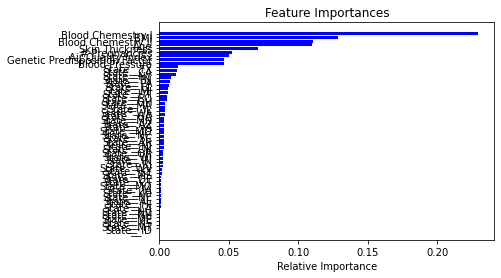

In [18]:
importances = rf_model.named_steps["model"].feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=all_features)

Weight,Feature
0.2296 ± 0.2305,Blood Chemestry I
0.1282 ± 0.1908,BMI
0.1107 ± 0.1876,Blood Chemestry II
0.1096 ± 0.1400,Age
0.0709 ± 0.1320,Skin Thickness
0.0521 ± 0.0900,# Pregnancies
0.0502 ± 0.0793,Air Quality Index
0.0468 ± 0.0623,Genetic Predisposition Factor
0.0463 ± 0.0794,Blood Pressure
0.0134 ± 0.0415,State__TX


In [20]:
pd.DataFrame(rf_model.named_steps["preprocessor"].transform(X_train), columns=all_features).head()

,# Pregnancies,Blood Chemestry I,Blood Chemestry II,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Quality Index,State__AL,...,State__PA,State__RI,State__SC,State__TN,State__TX,State__UT,State__VA,State__WA,State__WI,State__WV
0,5.0,162.0,179.093023,104.000000,34.813559,37.7,0.2,52.0,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,106.0,164.266667,70.000000,29.666667,34.2,0.3,52.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,129.0,179.093023,75.561644,34.813559,38.5,0.3,41.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,105.0,68.000000,70.000000,32.000000,30.8,0.1,37.0,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,89.0,94.000000,66.000000,23.000000,28.1,0.2,21.0,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import shap
observations = pd.DataFrame(rf_model.named_steps["preprocessor"].transform(X_train),columns=all_features)
shap_values = shap.TreeExplainer(rf_model.named_steps["model"]).shap_values(observations)


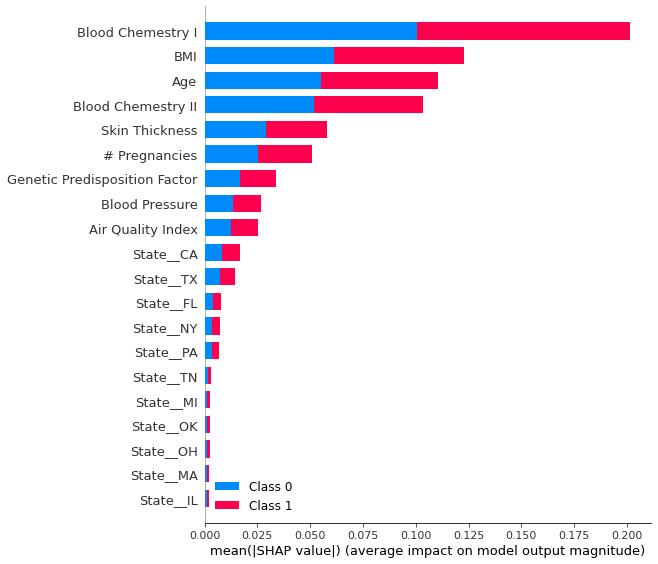

In [33]:
shap.summary_plot(shap_values, features=observations, feature_names=observations.columns)

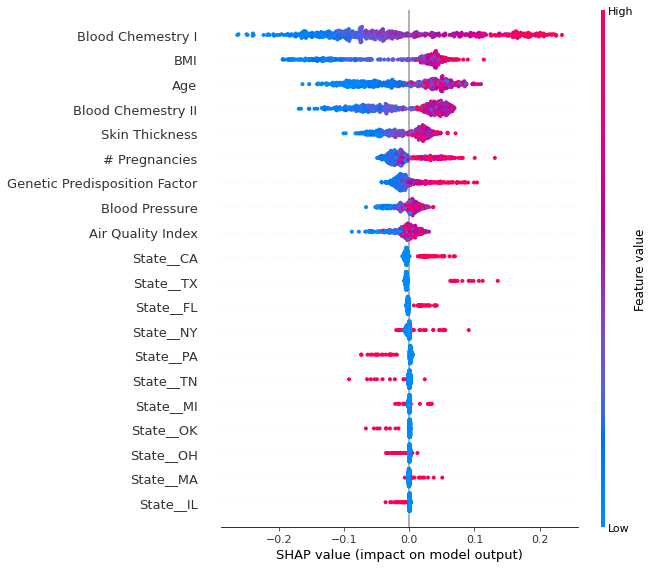

In [34]:
shap.summary_plot(shap_values[1], observations)

In [60]:
choosen_instance = pd.DataFrame(rf_model.named_steps["preprocessor"].transform(X_test.loc[[740]]), columns=all_features)
shap_values = shap.TreeExplainer(rf_model.named_steps["model"]).shap_values(choosen_instance)
shap.force_plot(shap.TreeExplainer(rf_model.named_steps["model"]).expected_value[1], shap_values[1], choosen_instance)